/tmp/ipykernel_13337/1515176608.py:15: RuntimeWarning: divide by zero encountered in divide
  fy_a = uniform.pdf(np.sqrt(y_a)) / (2 * np.sqrt(y_a))
/tmp/ipykernel_13337/1515176608.py:32: RuntimeWarning: divide by zero encountered in divide
  y_b = 1 / x


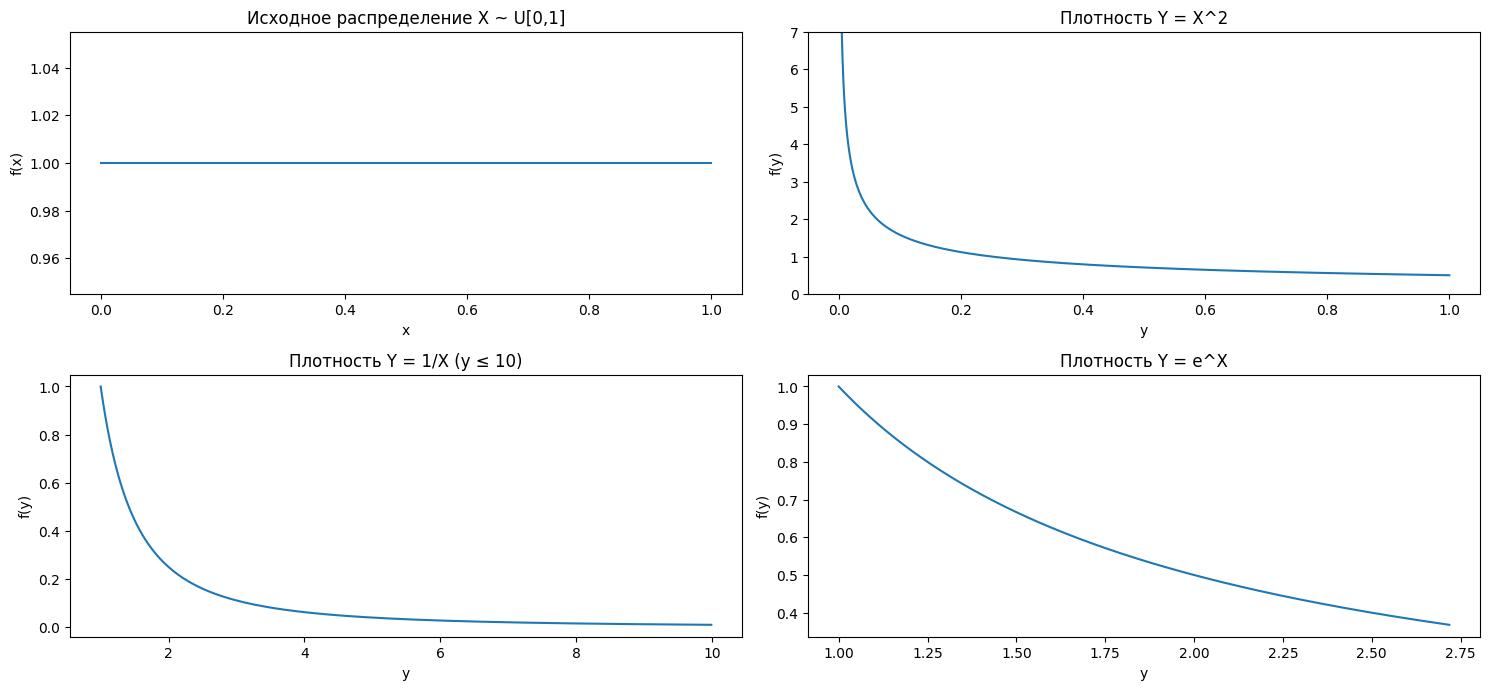

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, cauchy
import seaborn as sns

# Исходное равномерное распределение X ~ U[0, 1]
x = np.linspace(0, 1, 1000)
fx = uniform.pdf(x)

plt.figure(figsize=(15, 10))

### а) Y = X^2
y_a = x**2
# Метод преобразования: f_Y(y) = f_X(√y) / (2√y)
fy_a = uniform.pdf(np.sqrt(y_a)) / (2 * np.sqrt(y_a))

plt.subplot(3, 2, 1)
plt.plot(x, fx, label='f_X(x)')
plt.title('Исходное распределение X ~ U[0,1]')
plt.xlabel('x')
plt.ylabel('f(x)')


plt.subplot(3, 2, 2)
plt.plot(y_a, fy_a, label='f_Y(y) для Y=X^2')
plt.title('Плотность Y = X^2')
plt.xlabel('y')
plt.ylabel('f(y)')
plt.ylim(0, 7)

### б) Y = 1/X
y_b = 1 / x
# Метод преобразования: f_Y(y) = f_X(1/y) / y^2
fy_b = uniform.pdf(1 / y_b) / (y_b**2)
y_b_range = y_b[y_b <= 10] # Ограничиваем диапазон для визуализации
fy_b_range = fy_b[y_b <= 10]

plt.subplot(3, 2, 3)
plt.plot(y_b_range, fy_b_range, label='f_Y(y) для Y=1/X')
plt.title('Плотность Y = 1/X (y ≤ 10)')
plt.xlabel('y')
plt.ylabel('f(y)')

### в) Y = e^X
y_c = np.exp(x)
# Метод преобразования: f_Y(y) = f_X(ln(y)) / y
fy_c = uniform.pdf(np.log(y_c)) / y_c

plt.subplot(3, 2, 4)
plt.plot(y_c, fy_c, label='f_Y(y) для Y=e^X')
plt.title('Плотность Y = e^X')
plt.xlabel('y')
plt.ylabel('f(y)')

plt.tight_layout()
plt.show()

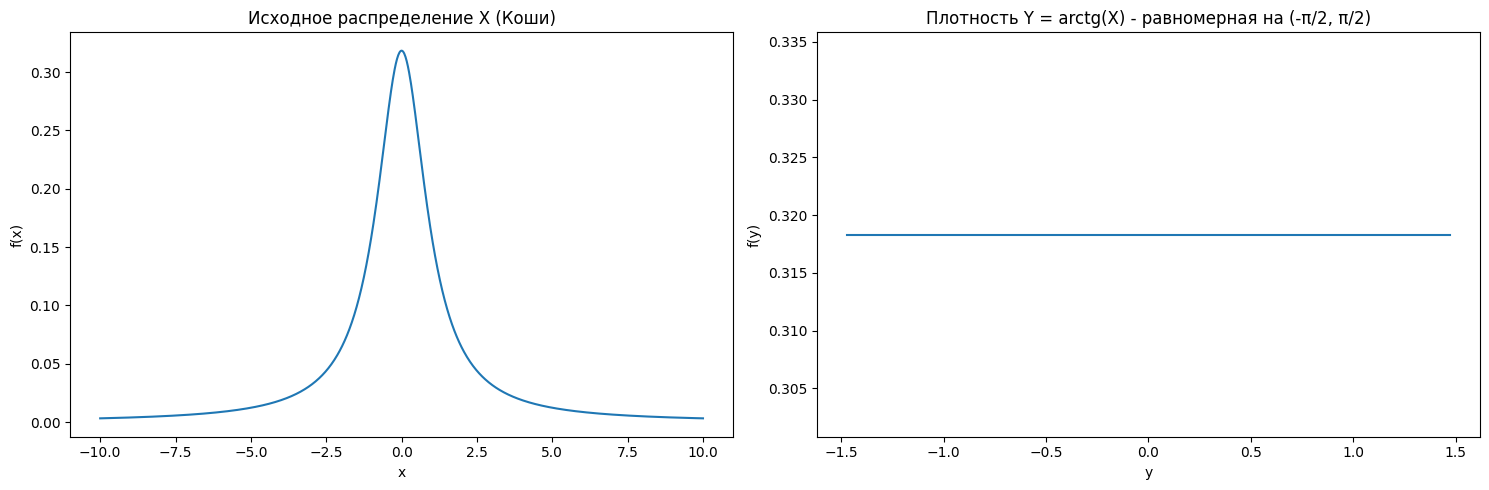

In [6]:
# Исходное распределение X с плотностью f(x) = 1/(π(1+x²))
# Это стандартное распределение Коши

x = np.linspace(-10, 10, 1000)
fx = cauchy.pdf(x)

# Y = arctg(X)
# Функция распределения F_Y(y) = P(Y ≤ y) = P(arctg(X) ≤ y) = P(X ≤ tg(y)) = F_X(tg(y))
# Плотность f_Y(y) = f_X(tg(y)) * (1 + tg²(y)) = [1/(π(1+tg²(y)))] * (1 + tg²(y)) = 1/π
# для y ∈ (-π/2, π/2)

y = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, 1000)
fy = uniform.pdf(y, loc=-np.pi/2, scale=np.pi) # Равномерное на (-π/2, π/2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x, fx, label='f_X(x)')
plt.title('Исходное распределение X (Коши)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(y, fy, label='f_Y(y) для Y=arctg(X)')
plt.title('Плотность Y = arctg(X) - равномерная на (-π/2, π/2)')
plt.xlabel('y')
plt.ylabel('f(y)')

plt.tight_layout()
plt.show()

P(X >= 1) = 0.2500
P(|X| >= 1) = 0.5000


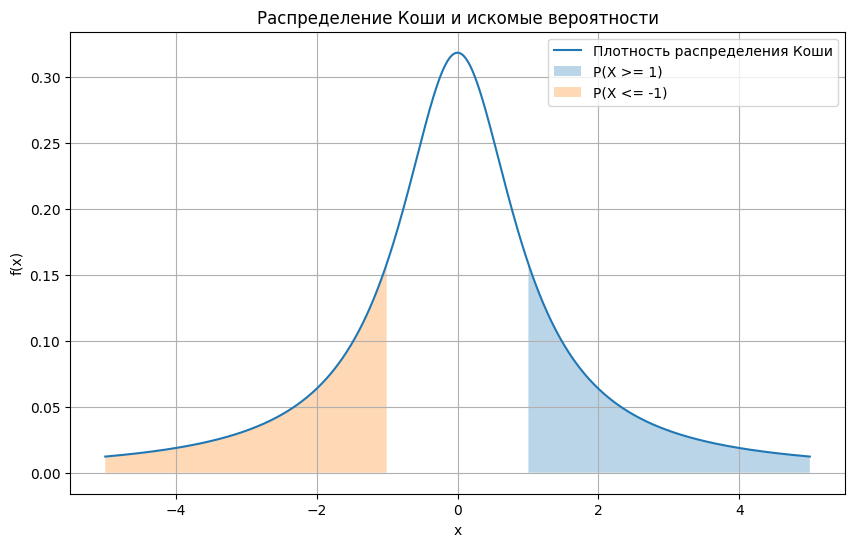

In [4]:
# Вычисление вероятностей для распределения Коши
from scipy.stats import cauchy

# a) P(X >= 1)
prob_a = 1 - cauchy.cdf(1)
print(f"P(X >= 1) = {prob_a:.4f}")

# б) P(|X| >= 1) = P(X <= -1) + P(X >= 1) = 2 * P(X >= 1) из-за симметрии
prob_b = 2 * prob_a
print(f"P(|X| >= 1) = {prob_b:.4f}")

# Визуализация
x = np.linspace(-5, 5, 1000)
pdf = cauchy.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Плотность распределения Коши')
plt.fill_between(x[x >= 1], pdf[x >= 1], alpha=0.3, label='P(X >= 1)')
plt.fill_between(x[x <= -1], pdf[x <= -1], alpha=0.3, label='P(X <= -1)')
plt.title('Распределение Коши и искомые вероятности')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 6.9

/tmp/ipykernel_10304/1617023742.py:96: RuntimeWarning: invalid value encountered in sqrt
  cdfka = np.where(m < 0, 0, np.where(m > 1, 1, (2/np.pi) * np.arctan((m/(1-m))**0.5)))


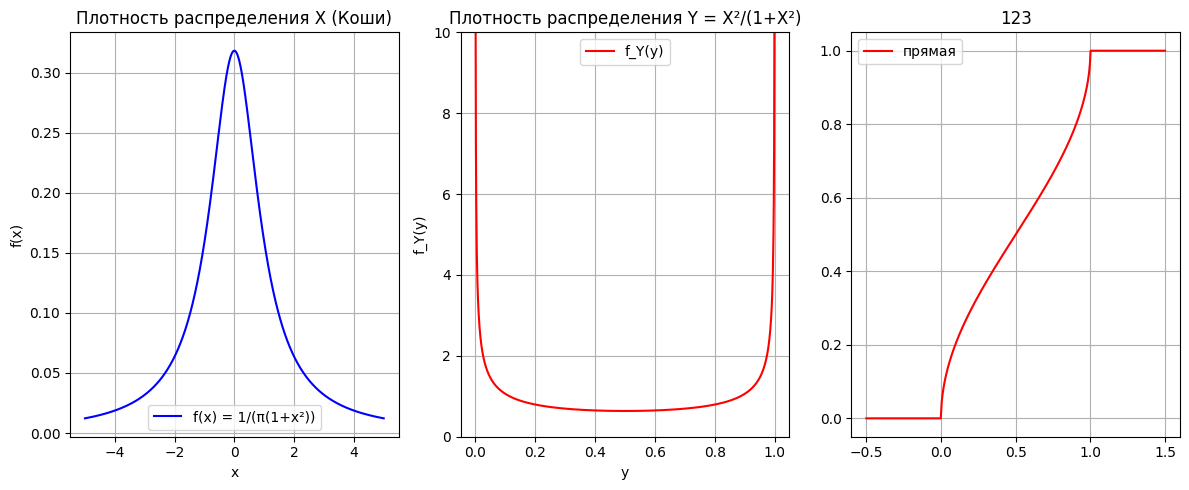

Аналитическое решение:
Плотность распределения Y имеет вид:
f_Y(y) = 1/(π√(y(1-y))) для y ∈ (0,1)
f_Y(y) = 0 для y ∉ [0,1]

Проверка:
Интеграл плотности на [0,1]: 1.000000 ≈ 1


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

# Вывод формулы для f_Y(y):
"""
1. Исходные данные:
   - X ~ Cauchy(0,1), f_X(x) = 1/(π(1+x²))
   - Y = X²/(1+X²)

2. Находим x из уравнения y = x²/(1+x²):
   y = x²/(1+x²)
   y(1+x²) = x²
   y + yx² = x²
   yx² - x² + y = 0
   x²(y-1) + y = 0
   x² = y/(1-y)
   x = ±√(y/(1-y))

3. Находим производную g'(x):
   g(x) = x²/(1+x²)
   g'(x) = (2x(1+x²) - 2x³)/(1+x²)² = 2x/(1+x²)²

4. Формула преобразования плотности:
   f_Y(y) = Σ[f_X(x_i)/|g'(x_i)|], где x_i - решения y = g(x)import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

plt.figure(figsize=(12, 5))

x = np.linspace(-5, 5, 1000)
fx = cauchy.pdf(x)

plt.subplot(1, 2, 1)
plt.plot(x, fx, 'b-', label='f(x) = 1/(π(1+x²))')
plt.title('Плотность распределения X (Коши)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

y = np.linspace(0.001, 0.999, 1000)  # Избегаем точек 0 и 1 из-за особенностей
fy = 1 / (np.pi * np.sqrt(y * (1-y)))

plt.subplot(1, 2, 2)
plt.plot(y, fy, 'r-', label='f_Y(y)')
plt.title('Плотность распределения Y = X²/(1+X²)')
plt.xlabel('y')
plt.ylabel('f_Y(y)')
plt.grid(True)
plt.legend()
plt.ylim(0, 10)  

plt.tight_layout()
plt.show()

print("Аналитическое решение:")
print("Плотность распределения Y имеет вид:")
print("f_Y(y) = 1/(π√(y(1-y))) для y ∈ (0,1)")
print("f_Y(y) = 0 для y ∉ [0,1]")
   
5. Подставляем:
   x₁ = √(y/(1-y)) и x₂ = -√(y/(1-y))
   f_Y(y) = f_X(x₁)/|g'(x₁)| + f_X(x₂)/|g'(x₂)|
   
6. После подстановки и упрощения:
   f_Y(y) = 1/(π√(y(1-y)))
"""

plt.figure(figsize=(12, 5))

x = np.linspace(-5, 5, 1000)
fx = cauchy.pdf(x)

plt.subplot(1, 3, 1)
plt.plot(x, fx, 'b-', label='f(x) = 1/(π(1+x²))')
plt.title('Плотность распределения X (Коши)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

y = np.linspace(0.001, 0.999, 1000)  # Избегаем точек 0 и 1 из-за особенностей
fy = 1 / (np.pi * np.sqrt(y * (1-y)))

plt.subplot(1, 3, 2)
plt.plot(y, fy, 'r-', label='f_Y(y)')
plt.title('Плотность распределения Y = X²/(1+X²)')
plt.xlabel('y')
plt.ylabel('f_Y(y)')
plt.grid(True)
plt.legend()
plt.ylim(0, 10)  

m = np.linspace(-0.5, 1.5, 1000)
cdfka = np.where(m < 0, 0, np.where(m > 1, 1, (2/np.pi) * np.arctan((m/(1-m))**0.5)))
plt.subplot(1, 3, 3)
plt.plot(m, cdfka, 'r-', label='прямая')
plt.title('123')
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

print("Аналитическое решение:")
print("Плотность распределения Y имеет вид:")
print("f_Y(y) = 1/(π√(y(1-y))) для y ∈ (0,1)")
print("f_Y(y) = 0 для y ∉ [0,1]")

# Проверка корректности плотности
print("\nПроверка:")
from scipy import integrate

# Проверяем, что интеграл равен 1
integral, error = integrate.quad(lambda y: 1/(np.pi * np.sqrt(y * (1-y))), 0, 1)
print(f"Интеграл плотности на [0,1]: {integral:.6f} ≈ 1")

In [12]:
import numpy as np
from scipy.stats import expon

# Параметры
lambda_param = 4/3 # Получаем из условия о Var(10-4x) = 9
# Для парамтерического распределения Var(x) = 1/l^2
# 16(1/l^2) = 9
# l - 4/3

E_X = 1/lambda_param
E_X2 = 2/(lambda_param**2)
E = -E_X2 + 19*E_X - 90
print(f"\nЗначение: {E:.4f}")



Значение: -76.8750


Теоретическая вероятность P(1/X > 3) = P(X < 1/3) = 0.045167235
Размер выборки 1000: P(1/X > 3) ≈ 0.389000000
Размер выборки 10000: P(1/X > 3) ≈ 0.404800000
Размер выборки 100000: P(1/X > 3) ≈ 0.396620000
Размер выборки 1000000: P(1/X > 3) ≈ 0.398180000


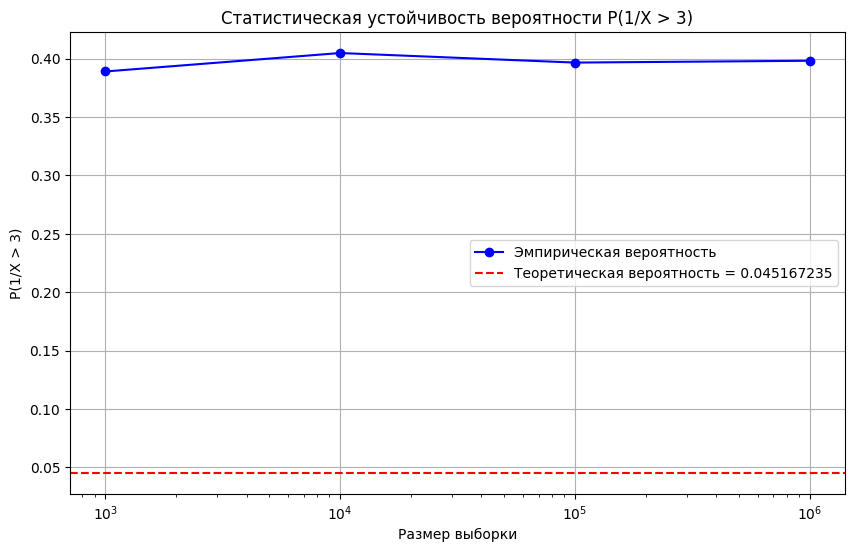

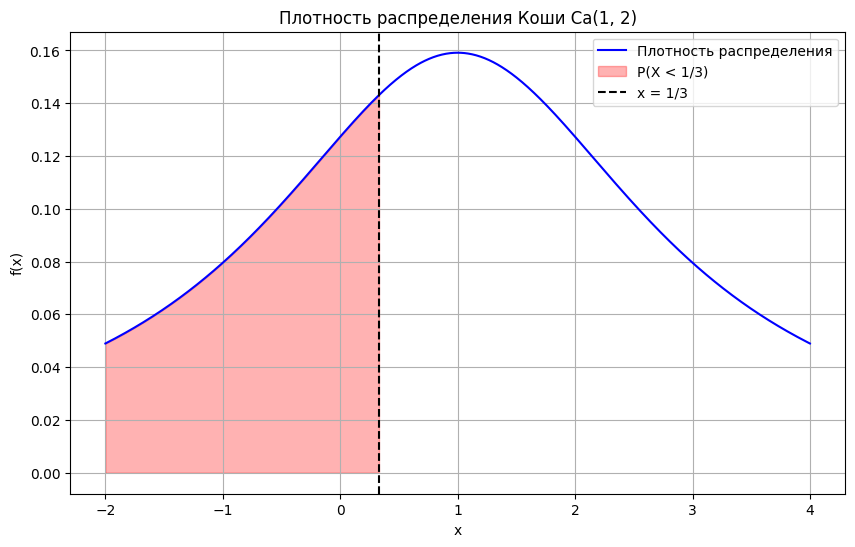

In [13]:
import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt

# Параметры распределения Коши
loc = 1  # параметр сдвига (a)
scale = 2  # параметр масштаба (γ)

# Теоретическая вероятность
theoretical_prob = 0.5 - np.arctan(7)/np.pi
print(f"Теоретическая вероятность P(1/X > 3) = P(X < 1/3) = {theoretical_prob:.9f}")

# Демонстрация статистической устойчивости
sample_sizes = [1000, 10000, 100000, 1000000]
results = []

for size in sample_sizes:
    # Генерируем выборку
    sample = cauchy.rvs(loc=loc, scale=scale, size=size)
    # Вычисляем долю значений, где 1/X > 3 (т.е. X < 1/3)
    prob = np.mean(sample < 1/3)
    results.append(prob)
    print(f"Размер выборки {size}: P(1/X > 3) ≈ {prob:.9f}")

# Визуализация статистической устойчивости
plt.figure(figsize=(10, 6))
plt.semilogx(sample_sizes, results, 'bo-', label='Эмпирическая вероятность')
plt.axhline(y=theoretical_prob, color='r', linestyle='--', 
            label=f'Теоретическая вероятность = {theoretical_prob:.9f}')
plt.grid(True)
plt.xlabel('Размер выборки')
plt.ylabel('P(1/X > 3)')
plt.title('Статистическая устойчивость вероятности P(1/X > 3)')
plt.legend()
plt.show()

# Визуализация плотности распределения
x = np.linspace(-2, 4, 1000)
pdf = cauchy.pdf(x, loc=loc, scale=scale)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', label='Плотность распределения')
plt.fill_between(x[x < 1/3], pdf[x < 1/3], color='red', alpha=0.3, 
                 label='P(X < 1/3)')
plt.axvline(x=1/3, color='k', linestyle='--', label='x = 1/3')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Плотность распределения Коши Ca(1, 2)')
plt.legend()
plt.show()

/tmp/ipykernel_10304/173086696.py:42: RuntimeWarning: divide by zero encountered in divide
  pdf = x/(2*R*np.sqrt(4*R**2 - x**2))  # Теоретическая плотность


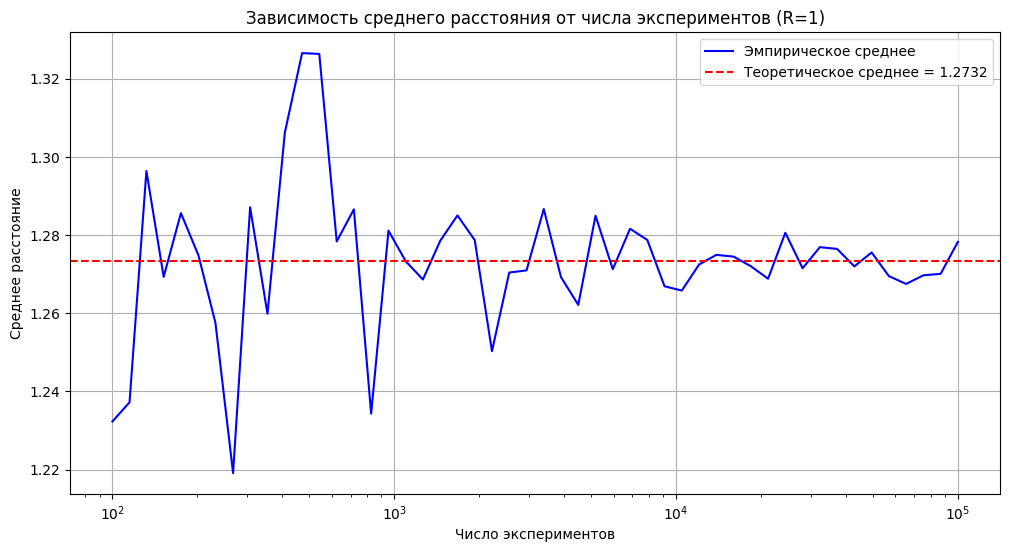

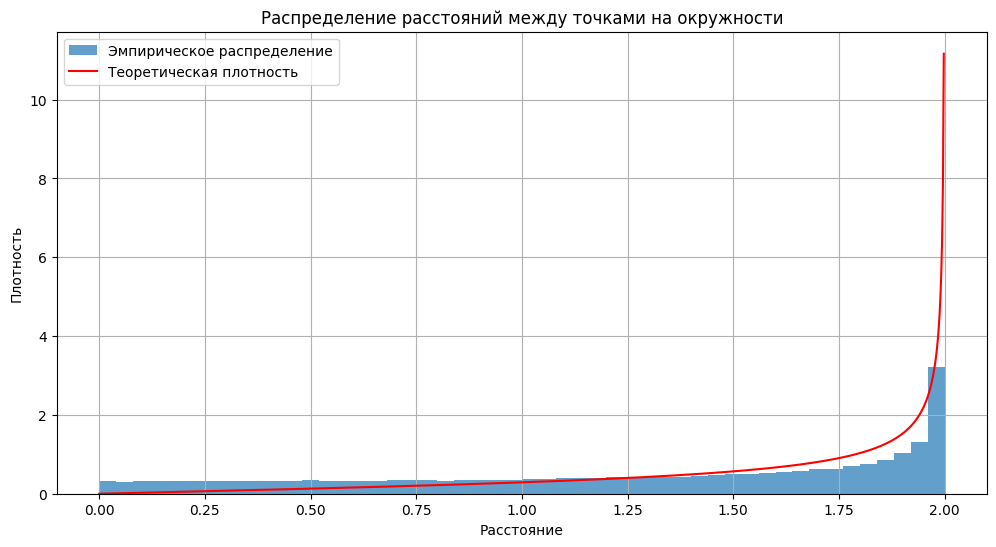

Теоретическое среднее расстояние: 1.2732
Эмпирическое среднее (100000 точек): 1.2737

Значения функции распределения:
F(0.5) = 0.1609
F(1.0) = 0.3333
F(1.5) = 0.5399
F(2.0) = 1.0000


In [36]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

def calculate_distances(n, R=1):
    angles1 = uniform.rvs(loc=0, scale=2*np.pi, size=n)
    angles2 = uniform.rvs(loc=0, scale=2*np.pi, size=n)
    
    x1 = R * np.cos(angles1)
    y1 = R * np.sin(angles1)
    x2 = R * np.cos(angles2)
    y2 = R * np.sin(angles2)
    
    distances = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distances

R = 1
sample_sizes = np.logspace(2, 5, 50, dtype=int)  # от 100 до 100000
means = []

for size in sample_sizes:
    distances = calculate_distances(size, R)
    means.append(np.mean(distances))

theoretical_mean = 4*R/np.pi

plt.figure(figsize=(12, 6))
plt.semilogx(sample_sizes, means, 'b-', label='Эмпирическое среднее')
plt.axhline(y=theoretical_mean, color='r', linestyle='--', 
            label=f'Теоретическое среднее = {theoretical_mean:.4f}')
plt.grid(True)
plt.xlabel('Число экспериментов')
plt.ylabel('Среднее расстояние')
plt.title('Зависимость среднего расстояния от числа экспериментов (R=1)')
plt.legend()

plt.figure(figsize=(12, 6))
distances = calculate_distances(100000, R)
plt.hist(distances, bins=50, density=True, alpha=0.7, label='Эмпирическое распределение')

x = np.linspace(0, 2*R, 1000)
pdf = x/(2*R*np.sqrt(4*R**2 - x**2))  # Теоретическая плотность
plt.plot(x, pdf, 'r-', label='Теоретическая плотность')

plt.xlabel('Расстояние')
plt.ylabel('Плотность')
plt.title('Распределение расстояний между точками на окружности')
plt.legend()
plt.grid(True)

plt.show()

print(f"Теоретическое среднее расстояние: {theoretical_mean:.4f}")
print(f"Эмпирическое среднее (100000 точек): {np.mean(distances):.4f}")

def cdf(x, R=1):
    if x < 0:
        return 0
    elif x > 2*R:
        return 1
    else:
        return 2/np.pi * np.arcsin(x/(2*R))

test_points = [0.5, 1.0, 1.5, 2.0]
print("\nЗначения функции распределения:")
for x in test_points:
    print(f"F({x}) = {cdf(x):.4f}")

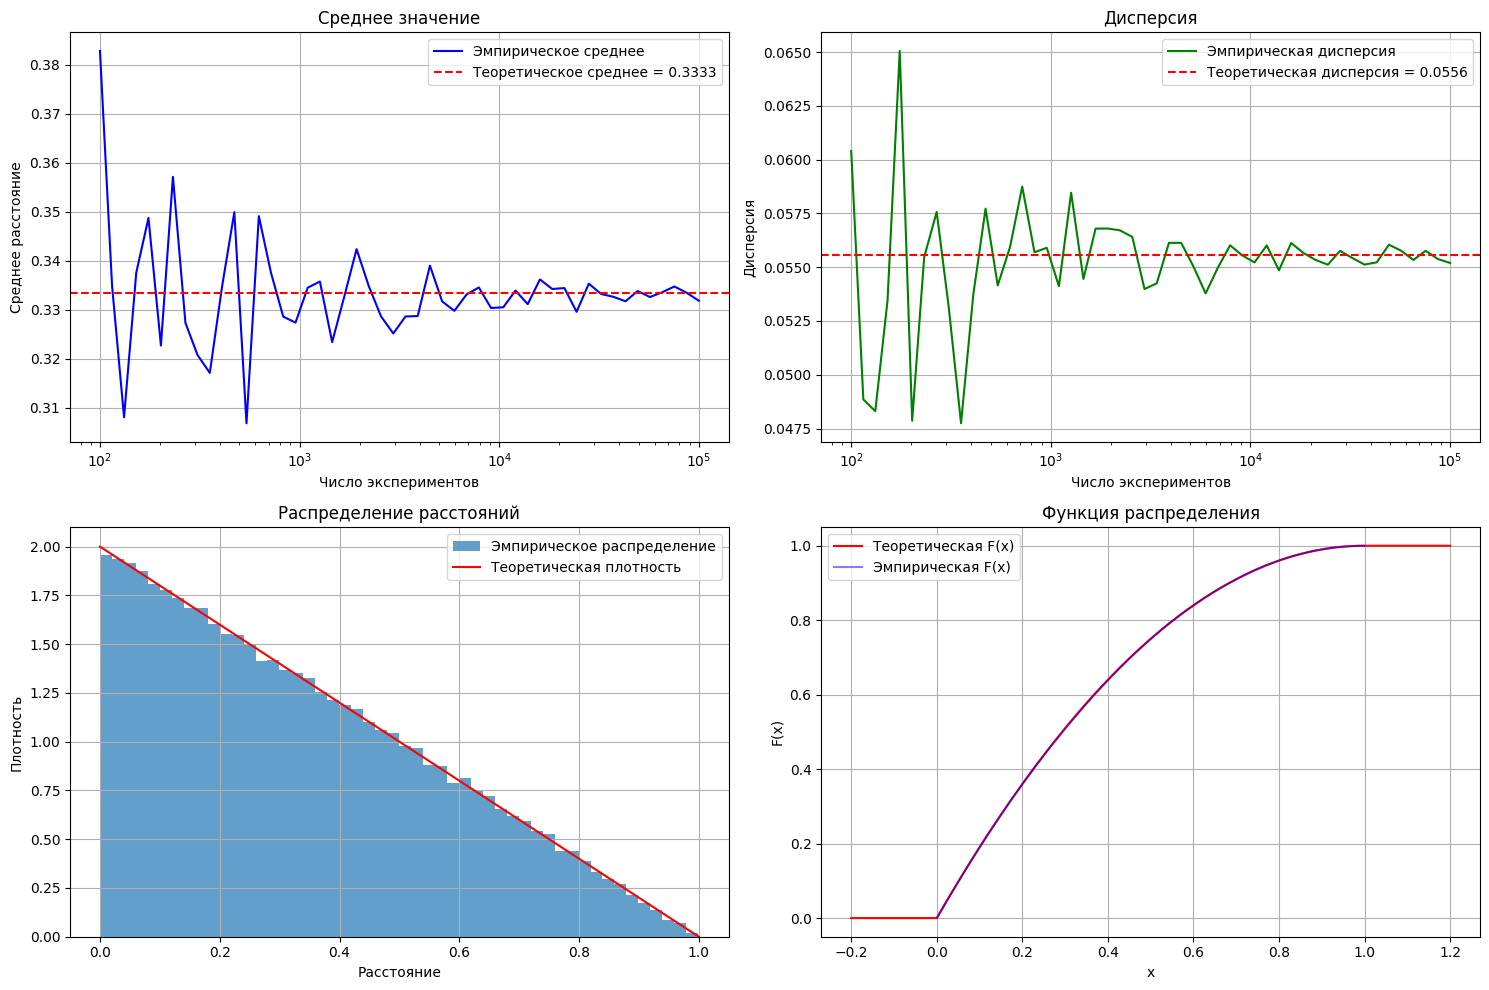

Теоретические значения для T=1:
E(γ) = 0.3333
Var(γ) = 0.0556
ν₃(γ) = 0.1000
ν₄(γ) = 0.0667

Эмпирические значения (100000 точек):
E(γ) ≈ 0.3338
Var(γ) ≈ 0.0555
ν₃(γ) ≈ 0.1000
ν₄(γ) ≈ 0.0665


In [15]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

def calculate_distances(n, T=1):
    # Генерируем точки на отрезке [0,T]
    points1 = uniform.rvs(loc=0, scale=T, size=n)
    points2 = uniform.rvs(loc=0, scale=T, size=n)
    
    # Вычисляем расстояния
    distances = np.abs(points2 - points1)
    return distances

def theoretical_moments(T=1, k=1):
    # Вычисляет теоретические моменты k-го порядка
    return 2 * T**k / ((k+1)*(k+2))

# Параметры моделирования
T = 1
sample_sizes = np.logspace(2, 5, 50, dtype=int)  # от 100 до 100000
means = []
variances = []
moments3 = []
moments4 = []

# Теоретические значения
theoretical_mean = T/3
theoretical_var = T**2/18
theoretical_moment3 = theoretical_moments(T, 3)
theoretical_moment4 = theoretical_moments(T, 4)

# Вычисляем статистики для разных размеров выборки
for size in sample_sizes:
    distances = calculate_distances(size, T)
    means.append(np.mean(distances))
    variances.append(np.var(distances))
    moments3.append(np.mean(distances**3))
    moments4.append(np.mean(distances**4))

# График зависимости среднего от числа экспериментов
plt.figure(figsize=(15, 10))

# График среднего
plt.subplot(2, 2, 1)
plt.semilogx(sample_sizes, means, 'b-', label='Эмпирическое среднее')
plt.axhline(y=theoretical_mean, color='r', linestyle='--', 
            label=f'Теоретическое среднее = {theoretical_mean:.4f}')
plt.grid(True)
plt.xlabel('Число экспериментов')
plt.ylabel('Среднее расстояние')
plt.title('Среднее значение')
plt.legend()

# График дисперсии
plt.subplot(2, 2, 2)
plt.semilogx(sample_sizes, variances, 'g-', label='Эмпирическая дисперсия')
plt.axhline(y=theoretical_var, color='r', linestyle='--',
            label=f'Теоретическая дисперсия = {theoretical_var:.4f}')
plt.grid(True)
plt.xlabel('Число экспериментов')
plt.ylabel('Дисперсия')
plt.title('Дисперсия')
plt.legend()

# Гистограмма распределения расстояний
plt.subplot(2, 2, 3)
distances = calculate_distances(100000, T)
plt.hist(distances, bins=50, density=True, alpha=0.7, label='Эмпирическое распределение')

# Теоретическая плотность
x = np.linspace(0, T, 1000)
pdf = 2*(T-x)/T**2  # Теоретическая плотность
plt.plot(x, pdf, 'r-', label='Теоретическая плотность')
plt.xlabel('Расстояние')
plt.ylabel('Плотность')
plt.title('Распределение расстояний')
plt.legend()
plt.grid(True)

# График функции распределения
plt.subplot(2, 2, 4)
x = np.linspace(-0.2*T, 1.2*T, 1000)
cdf = np.where(x < 0, 0, 
               np.where(x > T, 1, 
                       (2*T-x)*x/T**2))
plt.plot(x, cdf, 'r-', label='Теоретическая F(x)')
plt.plot(np.sort(distances), np.linspace(0, 1, len(distances)), 
         'b-', alpha=0.5, label='Эмпирическая F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Функция распределения')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Теоретические значения для T={T}:")
print(f"E(γ) = {theoretical_mean:.4f}")
print(f"Var(γ) = {theoretical_var:.4f}")
print(f"ν₃(γ) = {theoretical_moment3:.4f}")
print(f"ν₄(γ) = {theoretical_moment4:.4f}")

print("\nЭмпирические значения (100000 точек):")
print(f"E(γ) ≈ {np.mean(distances):.4f}")
print(f"Var(γ) ≈ {np.var(distances):.4f}")
print(f"ν₃(γ) ≈ {np.mean(distances**3):.4f}")
print(f"ν₄(γ) ≈ {np.mean(distances**4):.4f}")

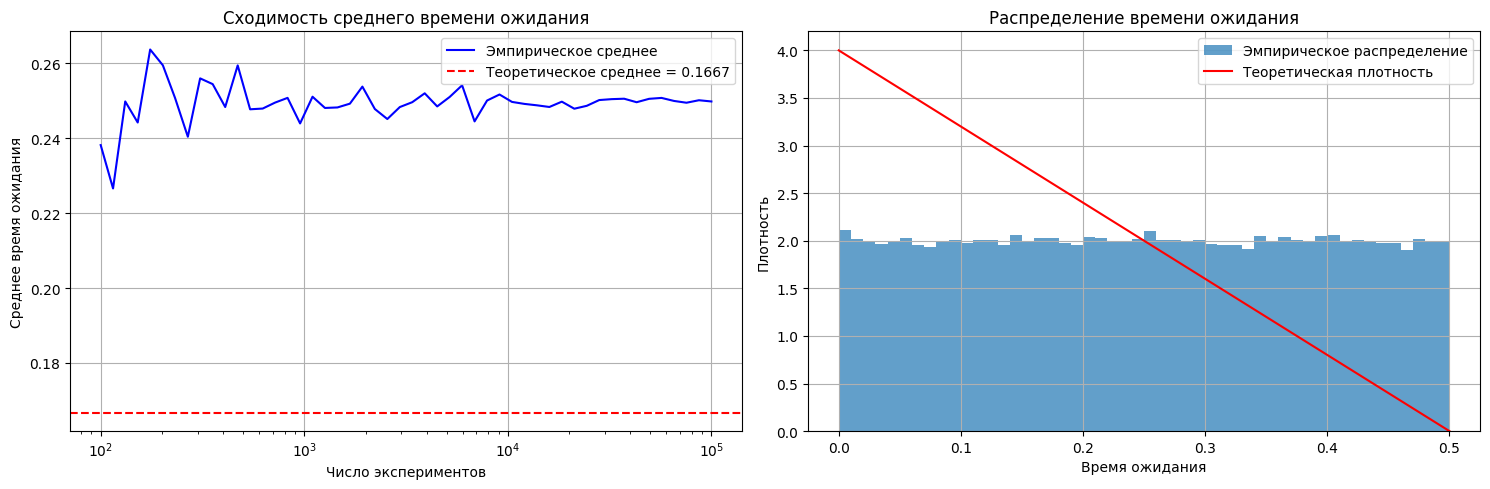


Теоретические значения для T=1:
E(τ) = 0.1667

Эмпирические значения (100000 точек):
E(τ) ≈ 0.2497

Значения функции распределения:
F(0.00) = 0.0000
F(0.25) = 0.7500
F(0.50) = 1.0000


In [16]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

def calculate_waiting_time(n, T=1):
    # Генерируем времена прихода
    time1 = uniform.rvs(loc=0, scale=T, size=n)
    time2 = uniform.rvs(loc=0, scale=T, size=n)
    
    # Вычисляем время ожидания (минимум из прямого и обратного времени)
    direct_wait = np.abs(time2 - time1)
    reverse_wait = T - direct_wait
    waiting_times = np.minimum(direct_wait, reverse_wait)
    return waiting_times

# Параметры моделирования
T = 1
sample_sizes = np.logspace(2, 5, 50, dtype=int)  # от 100 до 100000
means = []

# Теоретическое среднее время ожидания
theoretical_mean = T/6  # E(τ) = T/6

# Вычисляем средние значения для разных размеров выборки
for size in sample_sizes:
    waiting_times = calculate_waiting_time(size, T)
    means.append(np.mean(waiting_times))

# Создаем графики
plt.figure(figsize=(15, 5))

# График сходимости среднего
plt.subplot(1, 2, 1)
plt.semilogx(sample_sizes, means, 'b-', label='Эмпирическое среднее')
plt.axhline(y=theoretical_mean, color='r', linestyle='--', 
            label=f'Теоретическое среднее = {theoretical_mean:.4f}')
plt.grid(True)
plt.xlabel('Число экспериментов')
plt.ylabel('Среднее время ожидания')
plt.title('Сходимость среднего времени ожидания')
plt.legend()

# Гистограмма распределения времени ожидания
plt.subplot(1, 2, 2)
waiting_times = calculate_waiting_time(100000, T)
plt.hist(waiting_times, bins=50, density=True, alpha=0.7, 
         label='Эмпирическое распределение')

# Теоретическая плотность
x = np.linspace(0, T/2, 1000)
pdf = 4*(1-2*x/T)/T  # Теоретическая плотность
plt.plot(x, pdf, 'r-', label='Теоретическая плотность')
plt.xlabel('Время ожидания')
plt.ylabel('Плотность')
plt.title('Распределение времени ожидания')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Функция распределения
def cdf(x, T=1):
    if x < 0:
        return 0
    elif x > T/2:
        return 1
    else:
        return 4*x/T - 4*x**2/T**2

print(f"\nТеоретические значения для T={T}:")
print(f"E(τ) = {theoretical_mean:.4f}")
print(f"\nЭмпирические значения (100000 точек):")
print(f"E(τ) ≈ {np.mean(waiting_times):.4f}")

# Проверка функции распределения для нескольких значений
test_points = [0, T/4, T/2]
print("\nЗначения функции распределения:")
for x in test_points:
    print(f"F({x:.2f}) = {cdf(x):.4f}")